# 3D linear regression vizualization

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression, HuberRegressor
from tqdm import tqdm

import xgboost as xgb
sns.set(font_scale=2)
sns.set(context='paper', style="whitegrid", font_scale=3., font = 'serif')

In [2]:
E_pred_rand_test = np.load("e_test_1.npy")
E_true_rand_test = np.load("E_test_1.npy")
z_rand_test = np.load("z_test_1.npy")

E_pred_rand_test_2 = np.load("e_test_2.npy")
E_true_rand_test_2 = np.load("E_test_2.npy")
z_rand_test_2 = np.load("z_test_2.npy")

E_pred_rand_test_3 = np.load("e_test_3.npy")
E_true_rand_test_3 = np.load("E_test_3.npy")
z_rand_test_3 = np.load("z_test_3.npy")

In [3]:
E_pred_rand_test = np.concatenate([E_pred_rand_test, E_pred_rand_test_2, E_pred_rand_test_3])

E_true_rand_test = np.concatenate([E_true_rand_test, E_true_rand_test_2, E_true_rand_test_3])

z_rand_test = np.concatenate([z_rand_test, z_rand_test_2, z_rand_test_3])

In [4]:
import statsmodels.api as sm
X = np.column_stack([E_pred_rand_test, z_rand_test])
X = sm.add_constant(X)
rlm_model = sm.RLM(E_true_rand_test, X, M=sm.robust.norms.HuberT())
ols = rlm_model.fit()

In [5]:
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Robust linear model
==========================================================
Model:              RLM              Df Residuals: 13974  
Dependent Variable: y                Norm:         HuberT 
Date:               2021-10-12 12:28 Scale Est.:   mad    
No. Observations:   13977            Cov. Type:    H1     
Df Model:           2                Scale:        0.86422
-----------------------------------------------------------
         Coef.   Std.Err.     z      P>|z|   [0.025  0.975]
-----------------------------------------------------------
const    0.5482    0.0187   29.3894  0.0000  0.5116  0.5847
x1       0.0345    0.0001  529.7282  0.0000  0.0344  0.0347
x2       0.6505    0.0639   10.1741  0.0000  0.5251  0.7758
==========================================================

"""

In [6]:
x = E_pred_rand_test
y = z_rand_test
z = E_true_rand_test

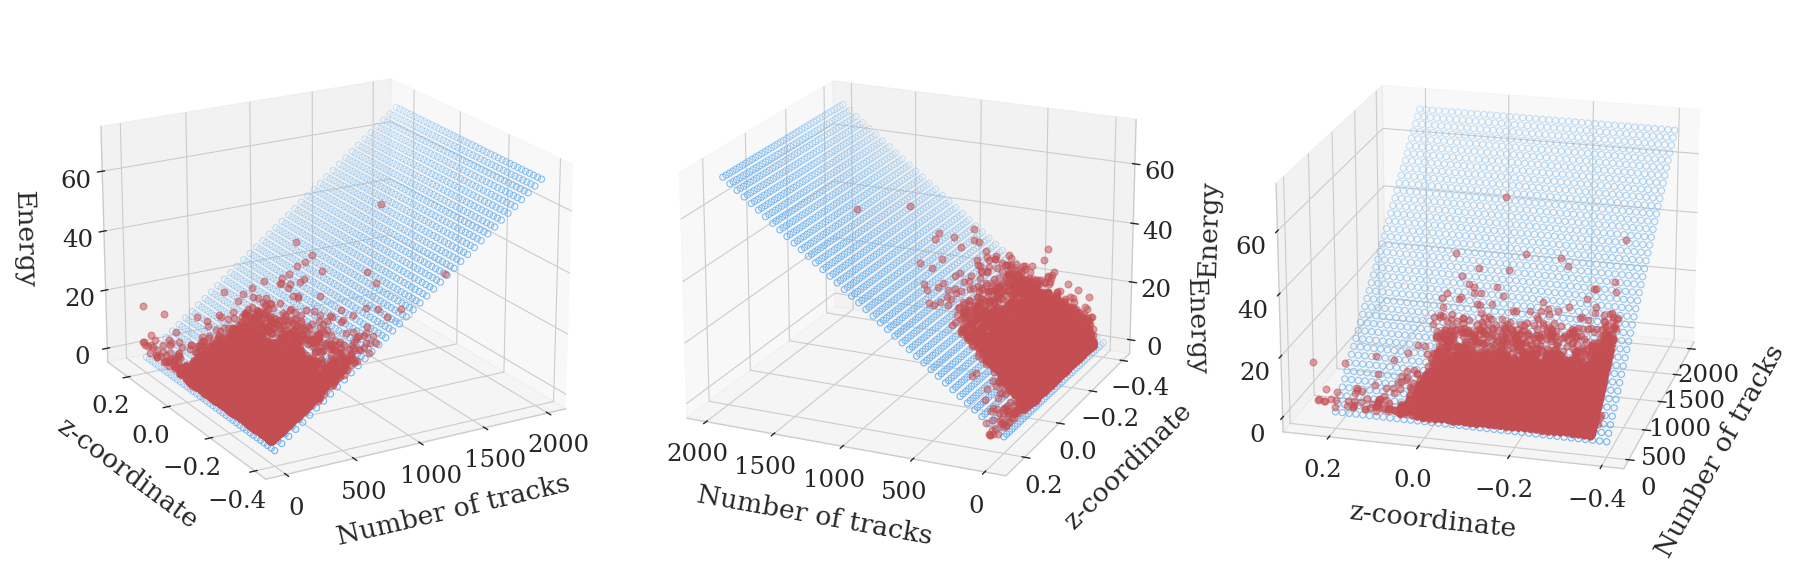

In [7]:
sns.set(context='paper', style="whitegrid", font_scale=2., font = 'serif')

x_pred = np.linspace(0, 2000, 40)   # range of porosity values
y_pred = np.linspace(-0.4, 0.2, 40)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
model_viz = sm.add_constant(model_viz)

################################################ Train #############################################

ols = sm.RLM(E_true_rand_test, X, M=sm.robust.norms.HuberT())
model = rlm_model.fit()
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = 0 # model.score(X, Y)

############################################## Plot ################################################

fig = plt.figure(figsize=(18, 12), dpi=100)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='r', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0, 0, 0, 0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Number of tracks', labelpad=15)
    ax.set_ylabel('z-coordinate', labelpad=15)
    #if ax != ax3:
    ax.set_zlabel('Energy', labelpad=15)
    ax.locator_params(tight=True, nbins=5, axis='x')
    ax.locator_params(tight=True, nbins=5, axis='y')

ax1.view_init(elev=20, azim=-120)
ax2.view_init(elev=20, azim=114)
# ax3.view_init(elev=-20, azim=180)
# ax3.view_init(elev=40, azim=0)
ax3.view_init(elev=20, azim=-165)

# fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout(pad=2)
fig.savefig("linear_regression_energy_reco.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [8]:
x = E_pred_rand_test
y = z_rand_test
z = E_true_rand_test

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                13977
Model:                            RLM   Df Residuals:                    13974
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 12 Oct 2021                                         
Time:                        12:28:04                                         
No. Iterations:                    27                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5482      0.019     29.389      0.000       0.512       0.585
x1             0.0345   6.52e-05    529.728      0.000       0.034       0.035
x2             0.6505      0.064     10.174      0.000       0.525       0.776
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [10]:
summary = model.summary2()

In [12]:
summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Robust linear model
==========================================================
Model:              RLM              Df Residuals: 13974  
Dependent Variable: y                Norm:         HuberT 
Date:               2021-10-12 12:28 Scale Est.:   mad    
No. Observations:   13977            Cov. Type:    H1     
Df Model:           2                Scale:        0.86422
-----------------------------------------------------------
         Coef.   Std.Err.     z      P>|z|   [0.025  0.975]
-----------------------------------------------------------
const    0.5482    0.0187   29.3894  0.0000  0.5116  0.5847
x1       0.0345    0.0001  529.7282  0.0000  0.0344  0.0347
x2       0.6505    0.0639   10.1741  0.0000  0.5251  0.7758
==========================================================

"""

# 2D linear regression vizualization

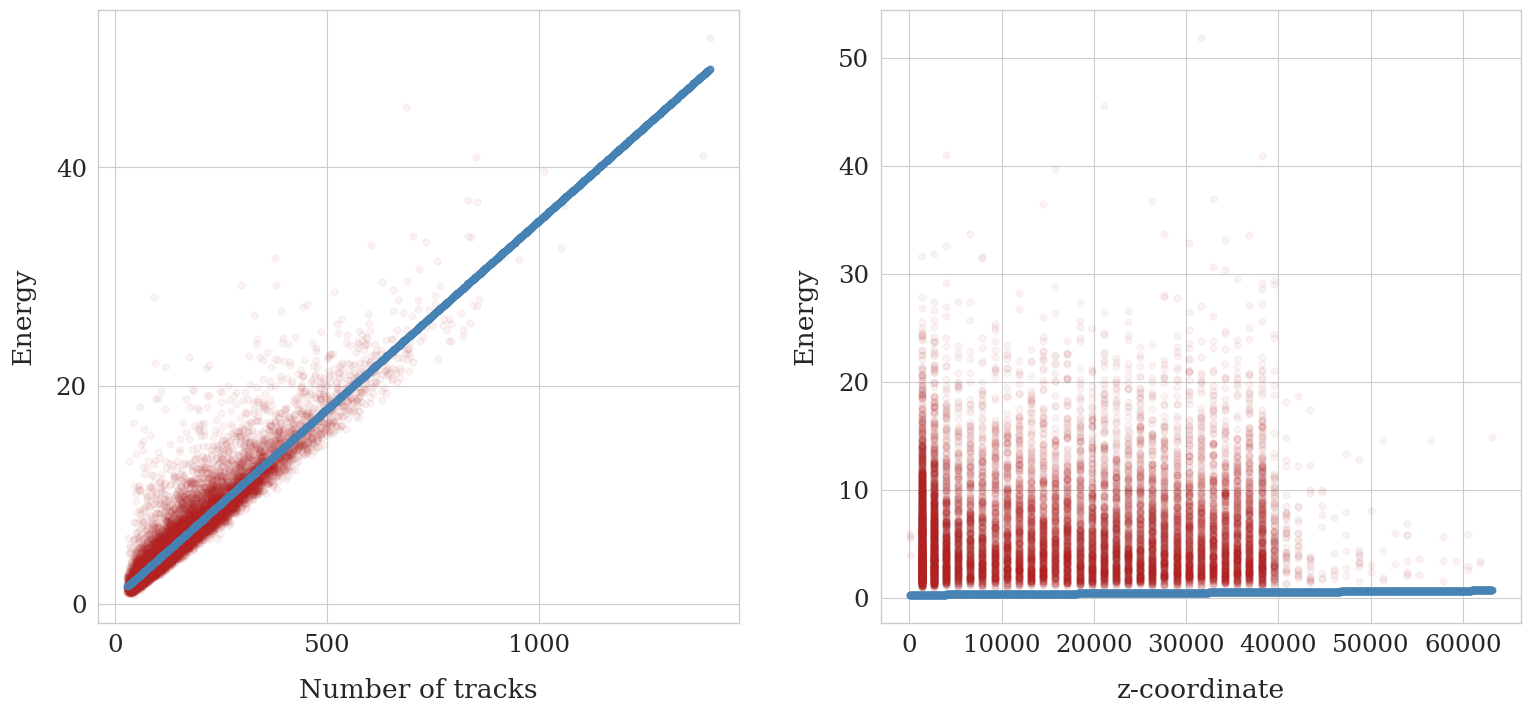

In [13]:
fig = plt.figure(figsize=(24, 8), dpi=100)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
axes = [ax1, ax2]

ax = ax1
ax.plot(x, z, color='firebrick', linestyle='none', marker='o', alpha=0.05)
xx = np.linspace(x.min(), x.max(), 1000)
zz = model.params[0] + model.params[1] * xx
ax.scatter(xx, zz, facecolor=(0, 0, 0, 0), edgecolor='steelblue', zorder=15)
ax.set_xlabel('Number of tracks', labelpad=15)
ax.set_ylabel('Energy', labelpad=15)
ax.locator_params(tight=True, nbins=5, axis='x')
ax.locator_params(tight=True, nbins=5, axis='y')

ax = ax2
ax.plot(y * 1e5 + 37506, z, color='firebrick', linestyle='none', marker='o', alpha=0.05)
yy = np.linspace(y.min(), y.max(), 1000)
zz = model.params[0] + model.params[2] * yy
ax.scatter(yy * 1e5 + 37506, zz, facecolor=(0, 0, 0, 0), edgecolor='steelblue', zorder=15)
ax.set_xlabel('z-coordinate', labelpad=15)
ax.set_ylabel('Energy', labelpad=15)


# fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout(pad=2)
fig.savefig("linear_regression_energy_reco_2d.pdf", bbox_inches = 'tight',
    pad_inches = 0)